In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from scipy.stats import mannwhitneyu
nltk.download('all')

/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading pac

True

In [2]:
data = pd.read_csv('data/sey.csv')

df = data[['place_name', 'rating', 'review_text', 'published_at_date']]
df

,place_name,rating,review_text,published_at_date
0,SEY Coffee,4,"While the coffee was good, it wasn t special e...",2024-04-23 00:38:56.636821
1,SEY Coffee,5,The best coffee place! Very good prices. No ad...,2024-04-23 00:38:56.640019
2,SEY Coffee,5,Loved the warehouse/loft vibes of this cafe. E...,2024-04-22 00:38:56.642399
3,SEY Coffee,5,NaN,2024-04-22 00:38:56.644581
4,SEY Coffee,5,NaN,2024-04-19 00:38:56.646793
...,...,...,...,...
722,SEY Coffee,5,"New spot on the block, love it!",2018-04-25 00:39:40.161758
723,SEY Coffee,5,Best cortado Ive ever had! Place is new and lo...,2018-04-25 00:39:40.163001
724,SEY Coffee,5,Just incredible.,2018-04-25 00:39:40.164231
725,SEY Coffee,5,"Amazing space, amazing coffee. I defy you to f...",2018-04-25 00:39:40.165405


Extracting Year from 'published_at_date' column

In [3]:
df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_72256/2592446673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year


,place_name,rating,review_text,published_at_date
0,SEY Coffee,4,"While the coffee was good, it wasn t special e...",2024
1,SEY Coffee,5,The best coffee place! Very good prices. No ad...,2024
2,SEY Coffee,5,Loved the warehouse/loft vibes of this cafe. E...,2024
3,SEY Coffee,5,NaN,2024
4,SEY Coffee,5,NaN,2024
...,...,...,...,...
722,SEY Coffee,5,"New spot on the block, love it!",2018
723,SEY Coffee,5,Best cortado Ive ever had! Place is new and lo...,2018
724,SEY Coffee,5,Just incredible.,2018
725,SEY Coffee,5,"Amazing space, amazing coffee. I defy you to f...",2018


Charts for ratings

<AxesSubplot:xlabel='rating'>

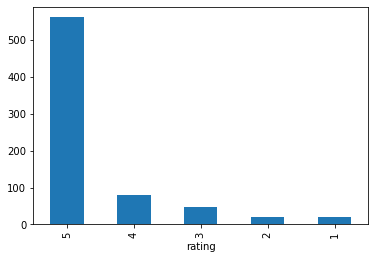

In [4]:
df['rating'].value_counts()[[5, 4, 3, 2, 1]].plot(kind='bar')

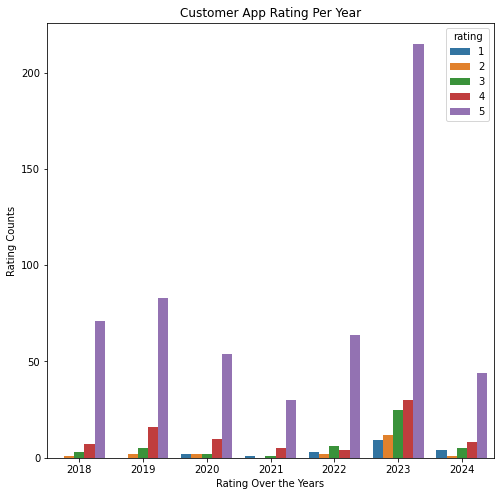

In [5]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'published_at_date', hue ='rating', data = df)
plt.title('Customer App Rating Per Year')
plt.xlabel("Rating Over the Years")
plt.ylabel('Rating Counts')
plt.show()

In [6]:
df['review_text'] = df['review_text'].astype("string")

df[['review_text']]

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_72256/2693296585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text'] = df['review_text'].astype("string")


,review_text
0,"While the coffee was good, it wasn t special e..."
1,The best coffee place! Very good prices. No ad...
2,Loved the warehouse/loft vibes of this cafe. E...
3,<NA>
4,<NA>
...,...
722,"New spot on the block, love it!"
723,Best cortado Ive ever had! Place is new and lo...
724,Just incredible.
725,"Amazing space, amazing coffee. I defy you to f..."


In [7]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = 'Stopwords.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [8]:
prep = []

for text in df['review_text']:
    if pd.isna(text):
        prep.append('')
    else:
        prep.append(preprocess(text))

df['prep'] = prep

df.head()

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_72256/1628437642.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prep'] = prep


,place_name,rating,review_text,published_at_date,prep
0,SEY Coffee,4,"While the coffee was good, it wasn t special e...",2024,coffe good wasn special warrant pourov bias cl...
1,SEY Coffee,5,The best coffee place! Very good prices. No ad...,2024,coffe place good price addit cost oat milk bea...
2,SEY Coffee,5,Loved the warehouse/loft vibes of this cafe. E...,2024,love warehous loft vibe cafe drink order spark...
3,SEY Coffee,5,<NA>,2024,
4,SEY Coffee,5,<NA>,2024,


In [9]:
from collections import Counter
Counter(" ".join(df["prep"]).split()).most_common(50)

[('coffe', 616),
 ('great', 169),
 ('place', 141),
 ('good', 116),
 ('nice', 85),
 ('space', 84),
 ('love', 79),
 ('shop', 72),
 ('staff', 67),
 ('vibe', 63),
 ('beauti', 61),
 ('sey', 59),
 ('espresso', 58),
 ('delici', 56),
 ('work', 54),
 ('cup', 53),
 ('drink', 51),
 ('friendli', 50),
 ('bean', 49),
 ('atmospher', 49),
 ('plant', 48),
 ('roast', 48),
 ('amaz', 47),
 ('water', 45),
 ('barista', 43),
 ('time', 43),
 ('back', 42),
 ('spot', 40),
 ('servic', 39),
 ('serv', 39),
 ('milk', 38),
 ('make', 38),
 ('tast', 37),
 ('latt', 36),
 ('light', 36),
 ('peopl', 35),
 ('laptop', 34),
 ('nyc', 33),
 ('seat', 32),
 ('cafe', 31),
 ('sparkl', 31),
 ('tea', 31),
 ('recommend', 31),
 ('pour', 30),
 ('excel', 30),
 ('pastri', 29),
 ('price', 28),
 ('sit', 28),
 ('lot', 28),
 ('cool', 27)]

In [10]:
def create_sentiment(rating):
    
    if rating==1 or rating==2:
        return -1 # negative sentiment
    elif rating==4 or rating==5:
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

df['sentiment'] = df['rating'].apply(create_sentiment)
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_72256/1400198503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['rating'].apply(create_sentiment)


,place_name,rating,review_text,published_at_date,prep,sentiment
0,SEY Coffee,4,"While the coffee was good, it wasn t special e...",2024,coffe good wasn special warrant pourov bias cl...,1
1,SEY Coffee,5,The best coffee place! Very good prices. No ad...,2024,coffe place good price addit cost oat milk bea...,1
2,SEY Coffee,5,Loved the warehouse/loft vibes of this cafe. E...,2024,love warehous loft vibe cafe drink order spark...,1
3,SEY Coffee,5,<NA>,2024,,1
4,SEY Coffee,5,<NA>,2024,,1
...,...,...,...,...,...,...
722,SEY Coffee,5,"New spot on the block, love it!",2018,spot block love,1
723,SEY Coffee,5,Best cortado Ive ever had! Place is new and lo...,2018,cortado ive place great price servic theyr hit...,1
724,SEY Coffee,5,Just incredible.,2018,incred,1
725,SEY Coffee,5,"Amazing space, amazing coffee. I defy you to f...",2018,amaz space amaz coffe defi find coffe shop nyc,1


<AxesSubplot:xlabel='sentiment', ylabel='count'>

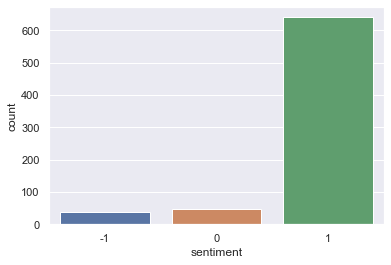

In [11]:
sns.set_theme()

# Create a visualization
sns.countplot(
    data=df,
    x="sentiment"
)

In [12]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return scores['compound']




# apply get_sentiment function

df['review_sentiment'] = df['prep'].apply(get_sentiment)

df['review_sentiment']

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_72256/3818571148.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_sentiment'] = df['prep'].apply(get_sentiment)


0      0.8689
1      0.4404
2      0.8750
3      0.0000
4      0.0000
        ...  
722    0.3182
723    0.6249
724    0.0000
725    0.0000
726    0.0000
Name: review_sentiment, Length: 727, dtype: float64

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(df['prep'])

years = df['published_at_date']

from sklearn.model_selection import train_test_split
y = df['sentiment'] # target variable
X_train, X_test, y_train, y_test, years_train, years_test = train_test_split(X,y, years)

In [14]:
# SVM
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

clf = LinearSVC(random_state=0)

clf.fit(X_train,y_train)

y_test_pred=clf.predict(X_test)

report=classification_report(y_test, y_test_pred, output_dict=True)
report

/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'-1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 10},
 '0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 9},
 '1': {'precision': 0.8950276243093923,
  'recall': 0.9938650306748467,
  'f1-score': 0.9418604651162791,
  'support': 163},
 'accuracy': 0.8901098901098901,
 'macro avg': {'precision': 0.2983425414364641,
  'recall': 0.33128834355828224,
  'f1-score': 0.313953488372093,
  'support': 182},
 'weighted avg': {'precision': 0.8015906745188514,
  'recall': 0.8901098901098901,
  'f1-score': 0.84353437260414,
  'support': 182}}

In [15]:
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency

predictions_df = pd.DataFrame({'Sentiment': y_test_pred, 'Years': years_test})

# Create a contingency table
contingency_table = pd.crosstab(predictions_df['Sentiment'], predictions_df['Years'])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("p-value:", p_val)
print("Expected frequencies:\n", expected)
print("Contingency table:\n", contingency_table)

Chi-square statistic: 14.244935543278086
Degrees of freedom: 6
p-value: 0.027016614225004187
Expected frequencies:
 [[1.20879121e-01 1.48351648e-01 9.34065934e-02 6.04395604e-02
  1.37362637e-01 3.73626374e-01 6.59340659e-02]
 [2.18791209e+01 2.68516484e+01 1.69065934e+01 1.09395604e+01
  2.48626374e+01 6.76263736e+01 1.19340659e+01]]
Contingency table:
 Years      2018  2019  2020  2021  2022  2023  2024
Sentiment                                          
0             0     0     0     0     0     0     1
1            22    27    17    11    25    68    11


In [16]:
# Wilcoxon rank-sum / Mann-whitney U Test
year = 2019

before_data = df[df['published_at_date'] < year]
after_data = df[df['published_at_date'] >= year]

u_stat, p_value_mw = mannwhitneyu(before_data['review_sentiment'], after_data['review_sentiment'])
print("Mann-Whitney U test - U-statistic:", u_stat, "p-value:", p_value_mw)

Mann-Whitney U test - U-statistic: 24619.0 p-value: 0.2880323864436337


In [17]:
# make altered data into csv file
df.to_csv('altdata/' + 'sey.csv', index=False)